In [74]:
import math
import numpy as np
from matplotlib import pyplot as plt

from typing import NamedTuple, Tuple

Grid = Tuple['numpy.ndarray', 'numpy.ndarray']

class Coords(NamedTuple):
    x: float
    y: float

    def __str__(self) -> str:
        return f'({self.x}, {self.y})'

class Rect:
    def __init__(self, x_start: float, x_end: float, y_start: float, y_end: float):
        self.x_start = x_start
        self.x_end = x_end
        self.y_start = y_start
        self.y_end = y_end

    def __str__(self) -> str:
        return 'Rect: x = {} .. {}, y = {} .. {}'\
            .format(self.x_start, self.x_end, self.y_start, self.y_end)
    
    @property
    def width(self) -> float:
        return self.x_end - self.x_start
    
    @property
    def height(self) -> float:
        return self.y_end - self.y_start
    
    @property
    def span_x(self) -> (float, float):
        return (self.x_start, self.x_end)
    
    @property
    def span_y(self) -> (float, float):
        return (self.y_start, self.y_end)

    def make_grid(self, N: int) -> ('numpy.ndarray', 'numpy.ndarray'):
        xs = np.linspace(self.x_start, self.x_end, N)
        ys = np.linspace(self.y_start, self.y_end, N)
        return np.meshgrid(xs, ys)


def setup_fig(rect: Rect, size: int,\
             *, xlabel: str = 'x', ylabel: str = 'y',\
             label_size: int = 16):
    plt.figure(figsize = (size, rect.height / rect.width * size))
    plt.xlabel(xlabel, fontsize = label_size)
    plt.ylabel(ylabel, fontsize = label_size)
    plt.xlim(*rect.span_x)
    plt.ylim(*rect.span_y)

def hypot(x0, y0, x1, y1):
    return (x1 - x0)**2 + (y0 - y1)**2


class Source:
    def __init__(self, x: float, y: float, strength: float):
        self.x = x
        self.y = y
        self.strength = strength
    
    @property
    def coords(self) -> Coords:
        return Coords(self.x, self.y)
    
    def __str__(self) -> str:
        return f'Source: ({self.x}, {self.y}), strength = {self.strength}'
    
    def velocity(self, grid: Grid) -> Grid:
        x, y = self.coords
        X, Y = grid
        coeff = self.strength / (2.0 * math.pi * hypot(x, y, X, Y))
        u = coeff * (X - x)
        v = coeff * (Y - y)
        return (u, v)
        

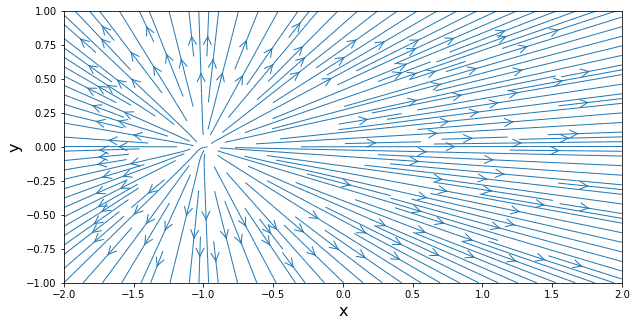

In [75]:
%matplotlib inline

N = 50
rect = Rect(-2.0, 2.0, -1.0, 1.0)
grid = rect.make_grid(N)

source = Source(-1.0, 0.0, 5.0)
u, v = source.velocity(grid)

size = 10
setup_fig(rect, size)
plt.streamplot(*grid, u, v, density=2, linewidth=1, arrowsize=2, arrowstyle='->')

In [62]:
rect = Rect(-1.0, 1.0, 0.0, 2.0)
print(rect)
print(rect.span_x)
print(rect.span_y)
print(rect.width, rect.height)
print(*rect.make_grid(50), sep='\n')

Rect: x = -1.0 .. 1.0, y = 0.0 .. 2.0
(-1.0, 1.0)
(0.0, 2.0)
2.0 2.0
[-1.         -0.95918367 -0.91836735 -0.87755102 -0.83673469 -0.79591837
 -0.75510204 -0.71428571 -0.67346939 -0.63265306 -0.59183673 -0.55102041
 -0.51020408 -0.46938776 -0.42857143 -0.3877551  -0.34693878 -0.30612245
 -0.26530612 -0.2244898  -0.18367347 -0.14285714 -0.10204082 -0.06122449
 -0.02040816  0.02040816  0.06122449  0.10204082  0.14285714  0.18367347
  0.2244898   0.26530612  0.30612245  0.34693878  0.3877551   0.42857143
  0.46938776  0.51020408  0.55102041  0.59183673  0.63265306  0.67346939
  0.71428571  0.75510204  0.79591837  0.83673469  0.87755102  0.91836735
  0.95918367  1.        ]
[0.         0.04081633 0.08163265 0.12244898 0.16326531 0.20408163
 0.24489796 0.28571429 0.32653061 0.36734694 0.40816327 0.44897959
 0.48979592 0.53061224 0.57142857 0.6122449  0.65306122 0.69387755
 0.73469388 0.7755102  0.81632653 0.85714286 0.89795918 0.93877551
 0.97959184 1.02040816 1.06122449 1.10204082 1.142857

In [44]:
dot = Coords(0.0, 1.0)
print(dot)

(0.0, 1.0)


In [49]:
source = Source(*dot, 5.0)
print(source)

Source: (0.0, 1.0), strength = 5.0
